<a href="https://colab.research.google.com/github/elizaMa30/Formula-1-data/blob/main/Exploratory_Data_Analysis_in_Python_Class_2_0_Elizabeth_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PMF of age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

In [ ]:
import pandas as pd
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
brfss =pd.read_hdf('brfss.hdf5','brfss')

<li>Extract the variable <code>'AGE'</code> from the DataFrame <code>brfss</code> and assign it to age.
<li>Plot the PMF of <code>age</code> as a bar chart.

In [ ]:
age = brfss['AGE']

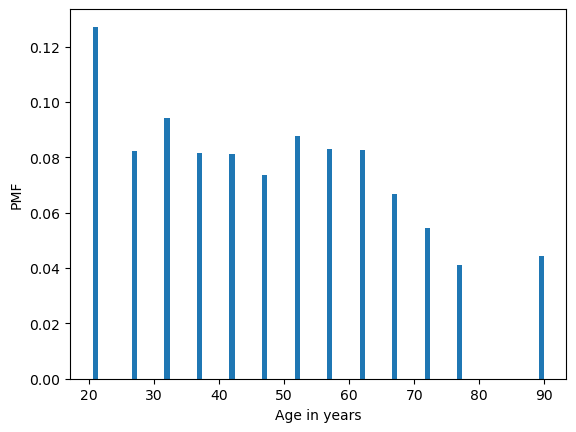

In [ ]:
# Plot the PMF
pmf_age=Pmf.from_seq(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

## Scatter plot

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

<li> Make a scatter plot of <code>weight</code> and age with format string <code>'o'</code> and <code>alpha=0.1</code>.

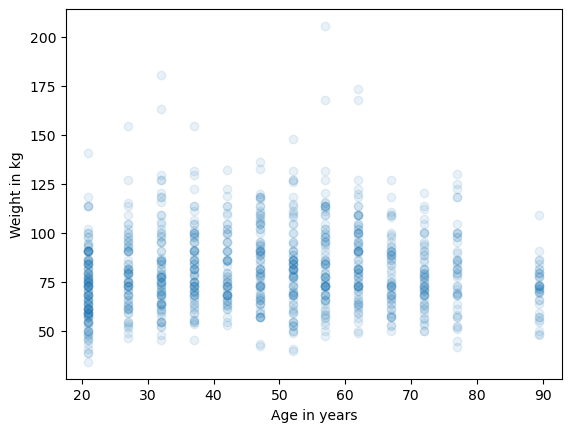

In [ ]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o',alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

## Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly.

<code>height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))</code>

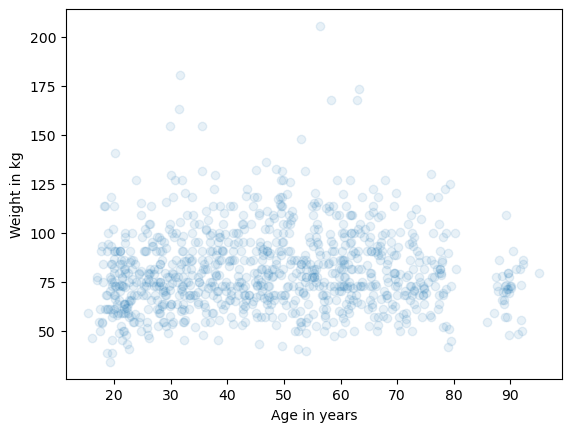

In [ ]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2,size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight,'o',alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## Height and weight

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

Recall we created the box plot of 'AGE' and 'WTKG3' in the presentation, with the y-axis on a logarithmic scale:

<code>sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')</code>

<li> Fill in the parameters of <code>.boxplot()</code> to plot the distribution of weight (<code>'WTKG3'</code>) in each height (<code>'_HTMG10'</code>) group. Specify <code>whis=10</code>.
<li> Add a line to plot the y-axis on a logarithmic scale.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


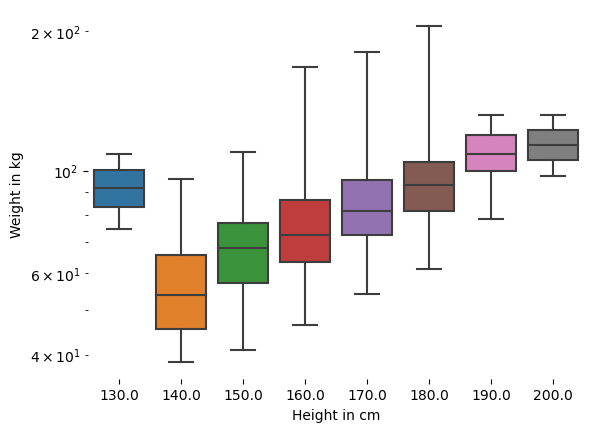

In [ ]:
# Drop rows with missing data
from cmath import log


data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot('_HTMG10','WTKG3',whis=10,data=data)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## Distribution of income

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is <code>'INCOME2'</code>. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all <code>Pmf</code> objects have a <code>.bar()</code> method.

<li> Extract <code>'INCOME2'</code> from the <code>brfss</code> DataFrame and assign it to <code>income</code>.
<li> Plot the PMF of <code>income</code> as a bar chart.

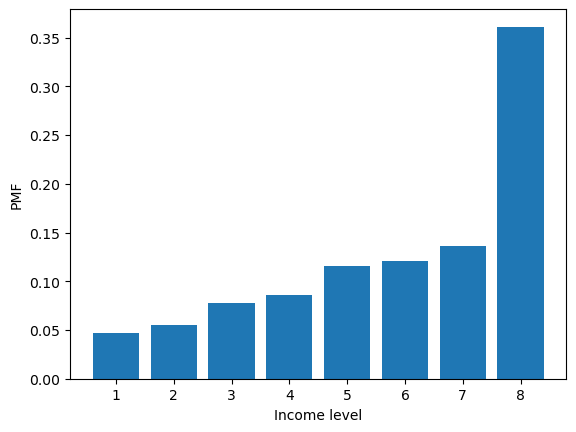

In [ ]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

## Income and height

Let's now use a violin plot to visualize the relationship between income and height.

<li> Create a violin plot to plot the distribution of height (<code>'HTM4'<(code>) in each income (<code>'INCOME2'</code>) group. Specify <code>inner=None</code> to simplify the plot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


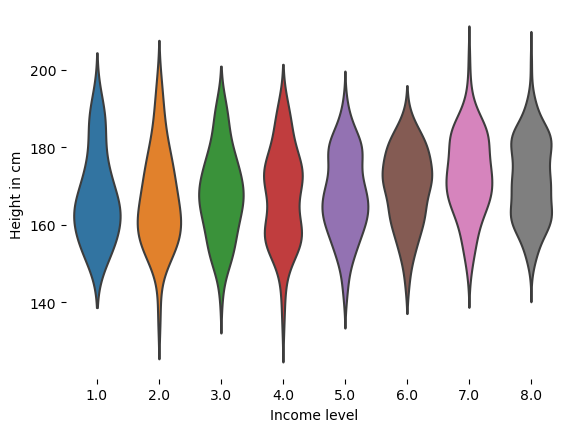

In [ ]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot('INCOME2','HTM4', inner=None, data=data)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Computing correlations

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable <code>'_VEGESU1'</code> represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

<li> From the <code>brfss</code> DataFrame, select the columns <code>'AGE'</code>, <code>'INCOME2'</code>, and <code>'_VEGESU1'</code>.
<li> Compute the correlation matrix for these variables.

In [ ]:
# Select columns
columns = ['AGE','INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


## Income and vegetables

As we saw in a previous exercise, the variable <code>'_VEGESU1'</code> represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

<li> Extract the columns <code>'INCOME2'</code> and <code>'_VEGESU1'</code> from <code>subset</code> into <code>xs</code> and <code>ys</code> respectively.
<li> Compute the simple linear regression of these variables.

In [ ]:
#from statistics import LinearRegression
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.07000027412424814, intercept=1.5413758521321235, rvalue=0.11526352353306701, pvalue=0.0015115444024927968, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)


## Fit a line

Continuing from the previous exercise:

<li> Assume that <code>xs</code> and <code>ys</code> contain income codes and daily vegetable consumption, respectively, and

<li> <code>res</code> contains the results of a simple linear regression of <code>ys</code> onto <code>xs</code>.

Now, you're going to compute the line of best fit. NumPy has been imported for you as <code>np</code>.

Intructions

<li> Set <code>fx</code> to the minimum and maximum of <code>xs</code>, stored in a NumPy array.
<li> Set <code>fy</code> to the points on the fitted line that correspond to the <code>fx</code>.

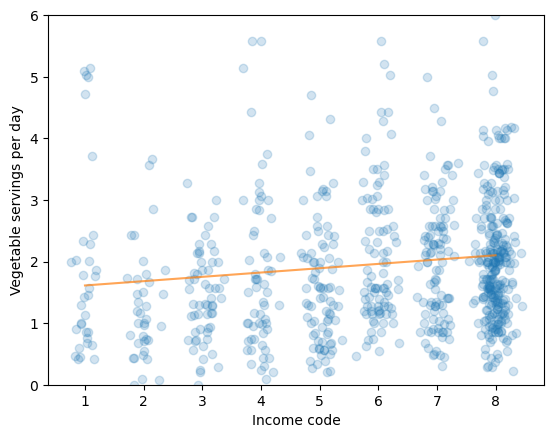

In [ ]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + (res.slope * fx)
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

## Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

<li> Compute the regression of <code>'_VEGESU1'</code> as a function of <code>'INCOME2'</code> using SciPy's <code>linregress()</code>.
<li> Compute the regression of <code>'_VEGESU1'</code> as a function of <code>'INCOME2'</code> using StatsModels' <code>mf.ols()</code>.

In [ ]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1~INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424814, intercept=1.5413758521321235, rvalue=0.11526352353306701, pvalue=0.0015115444024927968, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


## Plot income and education

To get a closer look at the relationship between income and education, let's use the variable <code>'educ'</code> to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called <code>gss</code>.

In [ ]:
gss=pd.read_hdf('gss.hdf5','gss')

<li> Group <code>gss</code> by <code>'educ'</code>. Store the result in grouped.
<li> From <code>grouped</code>, extract <code>'realinc'</code> and compute the mean.
<li> Plot <code>mean_income_by_educ</code> as a scatter plot. Specify <code>'o'</code> and <code>alpha=0.5</code>.

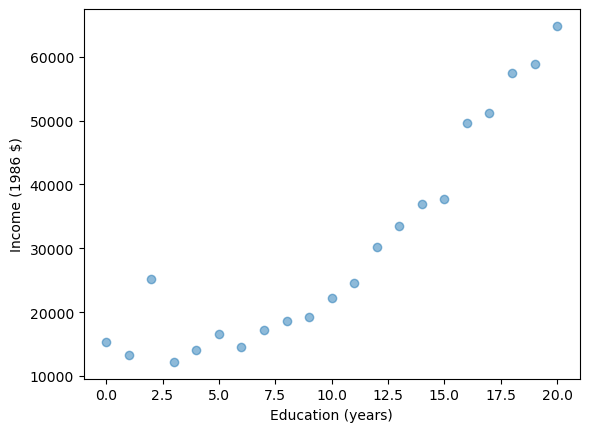

In [ ]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

## Non-linear model of education

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

<li> Add a column named <code>'educ2'</code> to the <code>gss</code> DataFrame; it should contain the values from <code>'educ'</code> squared.
<li> Run a regression model that uses <code>'educ'</code>, <code>'educ2'</code>, <code>'age'</code>, and <code>'age2'</code> to predict <code>'realinc'</code>.

In [ ]:
import statsmodels.formula.api as smf

# Add a new columns with educ and age squared
gss['educ2'] = gss['educ'] ** 2
gss['age2'] = gss['age'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


## Making predictions

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding <code>age</code> constant.

<li> Using <code>np.linspace()</code>, add a variable named <code>'educ'</code> to <code>df</code> with a range of values from <code>0</code> to <code>20</code>.
<li> Add a variable named <code>'age'</code> with the constant value <code>30</code>.
<li> Use <code>df</code> to generate predicted income as a function of education.

In [ ]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


## Visualizing predictions

Now let's visualize the results from the previous exercise!

<li> Plot <code>mean_income_by_educ</code> using circles (<code>'o'</code>). Specify an <code>alpha</code> of <code>0.5</code>.
<li> Plot the prediction results with a line, with <code>df['educ']</code> on the x-axis and <code>pred</code> on the y-axis.

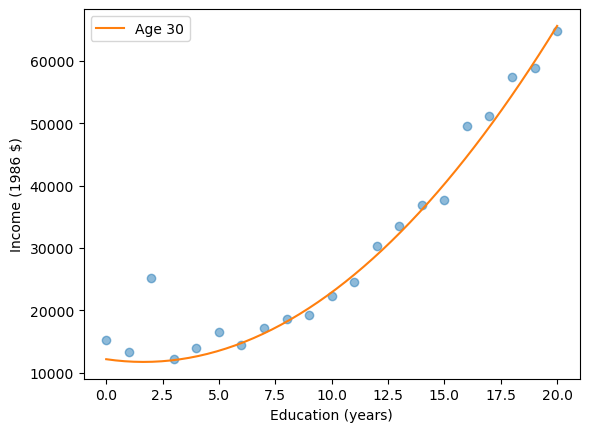

In [ ]:
# Plot mean income in each age group
plt.clf()
grouped# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()

plt.plot(mean_income_by_educ,'o',alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## Predicting a binary variable

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable <code>grass</code> records the answer to the question "Do you think the use of marijuana should be made legal or not?"

<li> Fill in the parameters of <code>smf.logit()</code> to predict <code>grass</code> using the variables <code>age</code>, <code>age2</code>, <code>educ</code>, and <code>educ2</code>, along with <code>sex</code> as a categorical variable.

In [ ]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

<li> Add a column called <code>educ</code> and set it to 12 years; then compute a second column, <code>educ2</code>, which is the square of <code>educ</code>.

In [ ]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

<li> Generate separate predictions for men and women.

In [ ]:
# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)
 
df['sex'] = 2
pred2 = results.predict(df)

<li> Fill in the missing code to compute the mean of <code>'grass'</code> for each age group, and then the arguments of <code>plt.plot()</code> to plot <code>pred2</code> versus <code>df['age']</code> with the label <code>'Female'</code>.

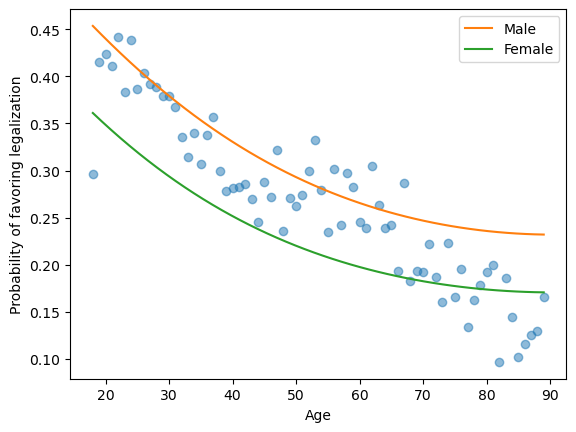

In [ ]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.clf()
plt.plot(favor_by_age, 'o', alpha=0.5)
 
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
 
plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()